## Работаем с библиотекой Geopandas. Наносим на карту МФЦ ЦАО Москвы

Как обычно, начинаем с библиотек:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import pandas as pd
import json

Датафрейм в Геопандас формируестя немного по-другому, чем в обычной Pandas.
Сначала загрузим файл с картой округов и райнов Москвы

In [2]:
data = gpd.read_file('C:/Users/Vladimir/Coding/CSV_Datasets/moscow.json')
data.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."


Смотрим на типы полей

In [3]:
data.dtypes

NAME           object
OKATO          object
OKTMO          object
NAME_AO        object
OKATO_AO       object
ABBREV_AO      object
TYPE_MO        object
geometry     geometry
dtype: object

Последний столбец с типом geometry - это значит, что можем строить геокарту

In [4]:
#Загрузка проекций Меркатора.(Позволяет отображать поверхность Земли на плокскости)
data.crs ='EPSG:3857'

Строим карту

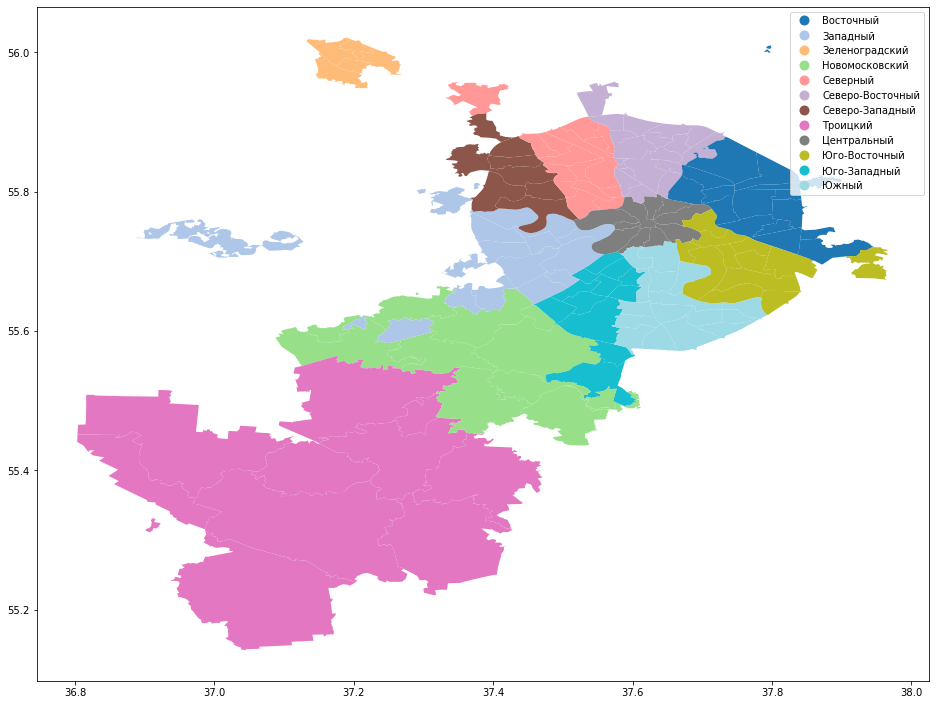

In [5]:
fig = plt.figure(figsize=(16,16))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True,column="NAME_AO", cmap="tab20")
plt.show()

Отлично. Но это вся Москва, а нас интересует только ЦАО. Поэтому построим карту только по этому округу

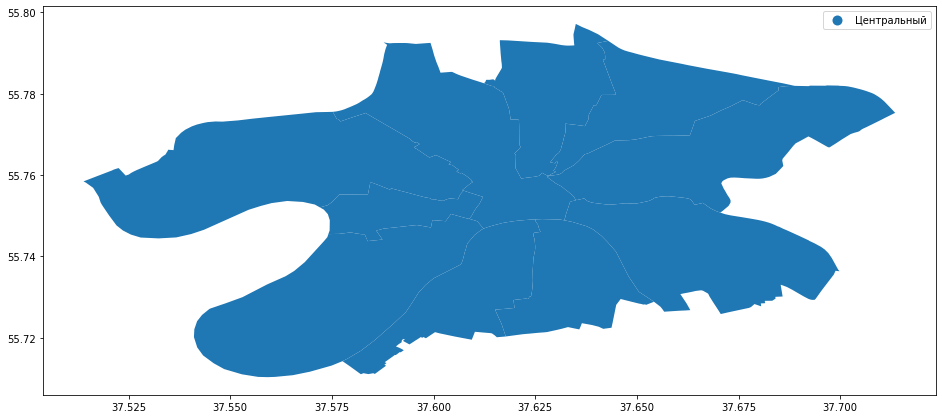

In [6]:
fig = plt.figure(figsize=(16,16))
area = plt.subplot(1, 1, 1)
data[data["NAME_AO"] == "Центральный"].plot(ax=area, legend=True,column="NAME_AO", cmap="tab20")
plt.show()

Загружаем файл с данными по МФЦ Москвы.
Этот и другие датасеты можно скачать с портала Открытых данных Москвы https://data.mos.ru/opendata

In [ ]:
data_mfc = gpd.read_file('C:/Users/Vladimir/Coding/CSV_Datasets/mfc.json')

У нас DrivetError. Geopandas не смогли распознать файл. Ок. Загружаем тогда в обычные Pandas

In [8]:
with open('C:/Users/Vladimir/Coding/CSV_Datasets/mfc.json', 'r') as f:   
    data_mfc = pd.DataFrame(json.load(f))
data_mfc.head()

,global_id,Availability,Code,CommonName,FullName,ShortName,INN,KPP,AdmArea,District,...,WorkingHours,ClarificationOfWorkingHours,OpenDate,ExtraServices,CenterArea,WindowCount,WebSite,UNOM,EntryState,geoData
0,3066058,"[{'available_g': 'полностью', 'available_k': '...",0054,Центр госуслуг района Красносельский,филиал Государственного бюджетного учреждения ...,МФЦ района Красносельский,7731419456,771001001,Центральный административный округ,Красносельский район,...,"[{'Hours': '08:00-20:00', 'DayOfWeek': 'понеде...","График работы служб, размещенных на территории...",25.03.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1024.6,54,www.md.mos.ru,4302764,активна,"{'type': 'Point', 'coordinates': [37.660717037..."
1,3066059,"[{'available_g': 'полностью', 'available_k': '...",0051,Центр госуслуг района Сокол,филиал Государственного бюджетного учреждения ...,МФЦ района Сокол,7731419456,771001001,Северный административный округ,район Сокол,...,"[{'Hours': '08:00-20:00', 'DayOfWeek': 'понеде...","График работы служб, размещенных на территории...",06.05.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1542.1,41,www.md.mos.ru,28320,активна,"{'type': 'Point', 'coordinates': [37.518206847..."
2,3066060,"[{'available_g': 'полностью', 'available_k': '...",0056,Центр госуслуг района Ново-Переделкино,филиал Государственного бюджетного учреждения ...,МФЦ района Ново-Переделкино,7731419456,771001001,Западный административный округ,район Ново-Переделкино,...,"[{'Hours': '08:00-20:00', 'DayOfWeek': 'понеде...","График работы служб, размещенных на территории...",03.06.2013,"[фотоуслуги, копировальные услуги, оплата госу...",751.8,37,www.md.mos.ru,2112552,активна,"{'type': 'Point', 'coordinates': [37.366429253..."
3,3066061,"[{'available_g': 'полностью', 'available_k': '...",0057,Центр госуслуг района Академический,филиал Государственного бюджетного учреждения ...,МФЦ района Академический,7731419456,771001001,Юго-Западный административный округ,Академический район,...,"[{'Hours': '08:00-20:00', 'DayOfWeek': 'понеде...","График работы служб, размещенных на территории...",13.06.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1554.1,54,www.md.mos.ru,2802203,активна,"{'type': 'Point', 'coordinates': [37.580068229..."
4,3066062,"[{'available_g': 'полностью', 'available_k': '...",0058,Центр госуслуг района Чертаново Южное,филиал Государственного бюджетного учреждения ...,МФЦ района Чертаново Южное,7731419456,771001001,Южный административный округ,район Чертаново Южное,...,"[{'Hours': '08:00-20:00', 'DayOfWeek': 'понеде...","График работы служб, размещенных на территории...",12.08.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1376.8,63,www.md.mos.ru,380132,активна,"{'type': 'Point', 'coordinates': [37.609509678..."


In [9]:
#Смотрим на типы полей:
data_mfc.dtypes

global_id                        int64
Availability                    object
Code                            object
CommonName                      object
FullName                        object
ShortName                       object
INN                             object
KPP                             object
AdmArea                         object
District                        object
Address                         object
ChiefName                       object
ChiefPosition                   object
PublicPhone                     object
WorkingHours                    object
ClarificationOfWorkingHours     object
OpenDate                        object
ExtraServices                   object
CenterArea                     float64
WindowCount                      int64
WebSite                         object
UNOM                            object
EntryState                      object
geoData                         object
dtype: object

Хоть поле geoData выглядит, как Geo-json, но Geopandas его распознать не захотел.
Поэтому сделаем необходиму трансформацию с помощью бибилиотеки shapely

In [10]:
from shapely.geometry import shape

In [11]:
geom = [shape(i) for i in data_mfc['geoData']]
gdf = gpd.GeoDataFrame(data_mfc, crs="EPSG:3857", geometry = geom) #Задаем Меркатор сразу

In [12]:
gdf.dtypes

global_id                         int64
Availability                     object
Code                             object
CommonName                       object
FullName                         object
ShortName                        object
INN                              object
KPP                              object
AdmArea                          object
District                         object
Address                          object
ChiefName                        object
ChiefPosition                    object
PublicPhone                      object
WorkingHours                     object
ClarificationOfWorkingHours      object
OpenDate                         object
ExtraServices                    object
CenterArea                      float64
WindowCount                       int64
WebSite                          object
UNOM                             object
EntryState                       object
geoData                          object
geometry                       geometry


Отлично, у нас появилось новое поле - geometry с типом geometry. Значит можно строить карту
Но сначала сделаем еще 1 преобразование

В данных по округам Москвы названия самих округов сокращенные (a-ka 'Центральный'), а в файле с МФЦ названия полные
(a-ka 'Центральный административный округ'). В МФЦ приведем данные к короткому названию.

In [13]:
gdf["AdmArea"] = gdf["AdmArea"].apply(lambda x:x.split(" ")[0])

In [14]:
#Смотрим на итогвый датафрейм:
gdf.head()

,global_id,Availability,Code,CommonName,FullName,ShortName,INN,KPP,AdmArea,District,...,ClarificationOfWorkingHours,OpenDate,ExtraServices,CenterArea,WindowCount,WebSite,UNOM,EntryState,geoData,geometry
0,3066058,"[{'available_g': 'полностью', 'available_k': '...",0054,Центр госуслуг района Красносельский,филиал Государственного бюджетного учреждения ...,МФЦ района Красносельский,7731419456,771001001,Центральный,Красносельский район,...,"График работы служб, размещенных на территории...",25.03.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1024.6,54,www.md.mos.ru,4302764,активна,"{'type': 'Point', 'coordinates': [37.660717037...",POINT (37.66072 55.78587)
1,3066059,"[{'available_g': 'полностью', 'available_k': '...",0051,Центр госуслуг района Сокол,филиал Государственного бюджетного учреждения ...,МФЦ района Сокол,7731419456,771001001,Северный,район Сокол,...,"График работы служб, размещенных на территории...",06.05.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1542.1,41,www.md.mos.ru,28320,активна,"{'type': 'Point', 'coordinates': [37.518206847...",POINT (37.51821 55.79715)
2,3066060,"[{'available_g': 'полностью', 'available_k': '...",0056,Центр госуслуг района Ново-Переделкино,филиал Государственного бюджетного учреждения ...,МФЦ района Ново-Переделкино,7731419456,771001001,Западный,район Ново-Переделкино,...,"График работы служб, размещенных на территории...",03.06.2013,"[фотоуслуги, копировальные услуги, оплата госу...",751.8,37,www.md.mos.ru,2112552,активна,"{'type': 'Point', 'coordinates': [37.366429253...",POINT (37.36643 55.64132)
3,3066061,"[{'available_g': 'полностью', 'available_k': '...",0057,Центр госуслуг района Академический,филиал Государственного бюджетного учреждения ...,МФЦ района Академический,7731419456,771001001,Юго-Западный,Академический район,...,"График работы служб, размещенных на территории...",13.06.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1554.1,54,www.md.mos.ru,2802203,активна,"{'type': 'Point', 'coordinates': [37.580068229...",POINT (37.58007 55.68073)
4,3066062,"[{'available_g': 'полностью', 'available_k': '...",0058,Центр госуслуг района Чертаново Южное,филиал Государственного бюджетного учреждения ...,МФЦ района Чертаново Южное,7731419456,771001001,Южный,район Чертаново Южное,...,"График работы служб, размещенных на территории...",12.08.2013,"[фотоуслуги, копировальные услуги, оплата госу...",1376.8,63,www.md.mos.ru,380132,активна,"{'type': 'Point', 'coordinates': [37.609509678...",POINT (37.60951 55.59247)


Строим чарт с данными по МФЦ

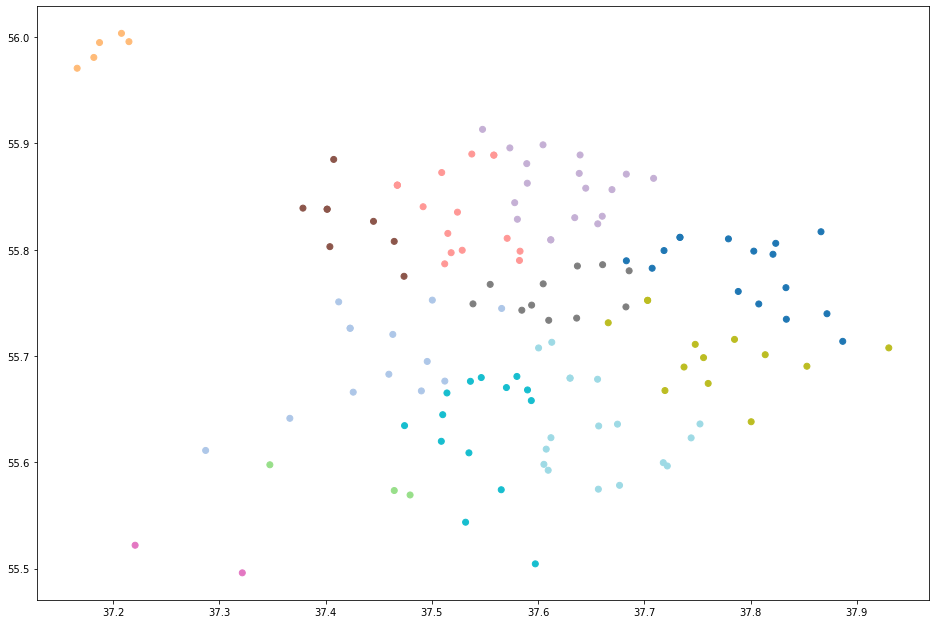

In [15]:
plt.close()
fig = plt.figure(figsize=(16,16))
area = plt.subplot(1, 1, 1)
gdf.plot(ax=area, legend=False, column="AdmArea", cmap="tab20")
plt.show()

Строим график по ЦАО в разрезе райнов

<AxesSubplot:>

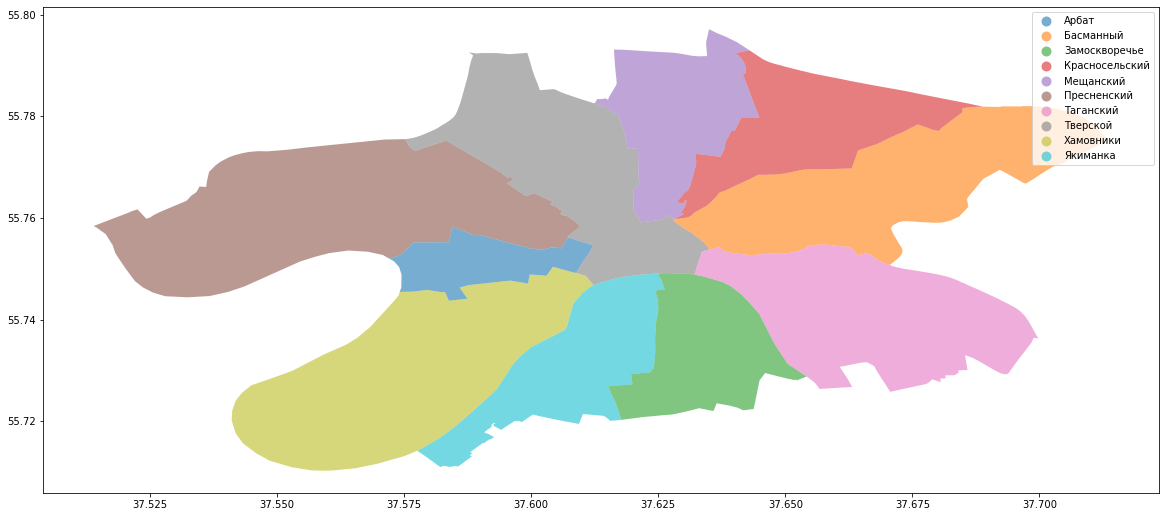

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6)

Пробуем наложить на него точки с МФЦ

<AxesSubplot:>

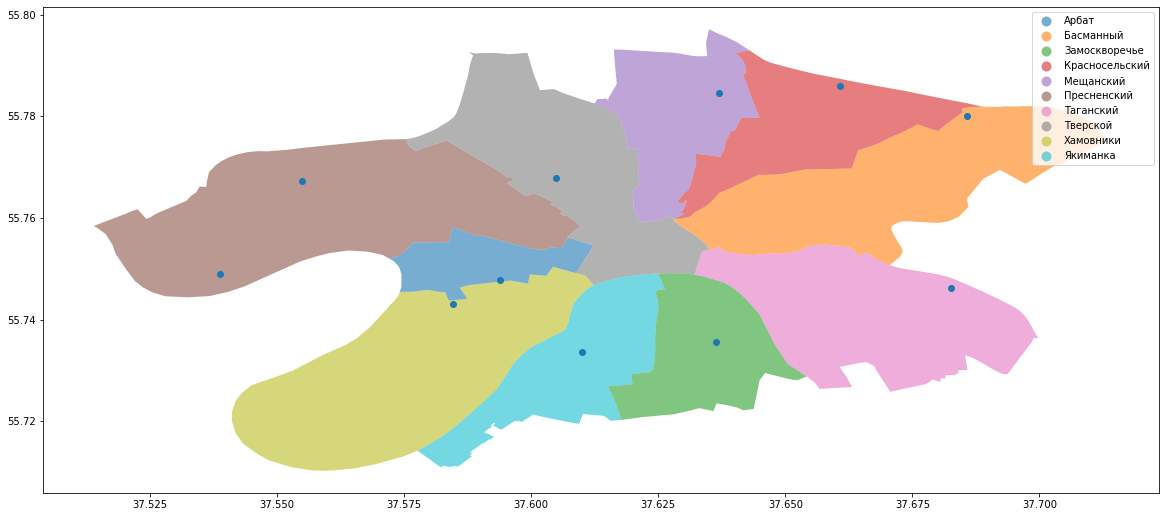

In [18]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
base = data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6)
gdf[gdf['AdmArea'] == "Центральный"].plot(legend=False,ax=base)

Сделаем точки более контрастными, чтобы не сливались цветом районов и добавим границы для районов

<AxesSubplot:>

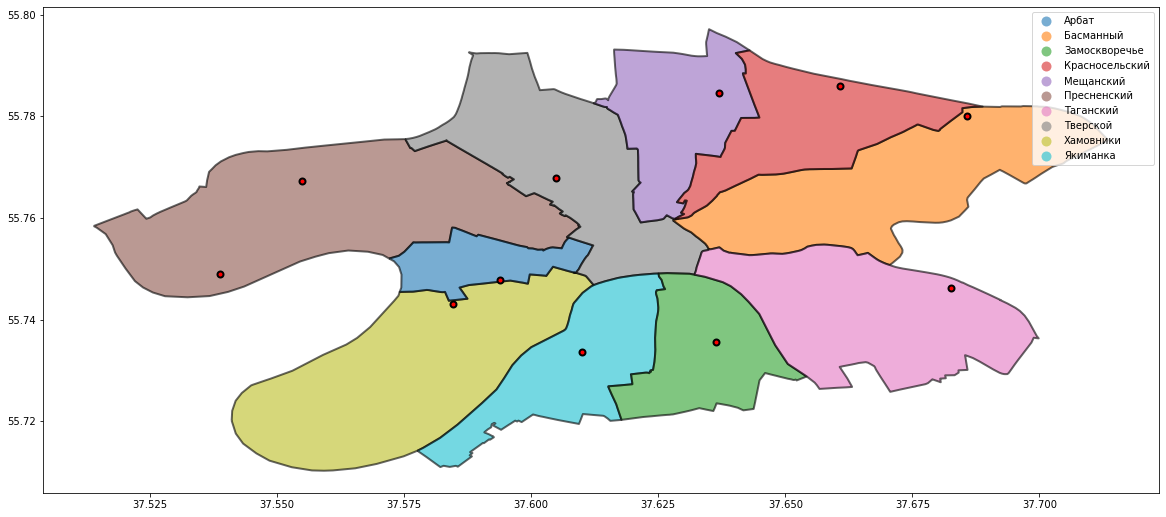

In [19]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
base = data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6, edgecolor='black', linewidth=2)
gdf[gdf['AdmArea'] == "Центральный"].plot(color='red',edgecolor='k',linewidth = 2, legend=False,ax=base)

Добавим подписи к точкам

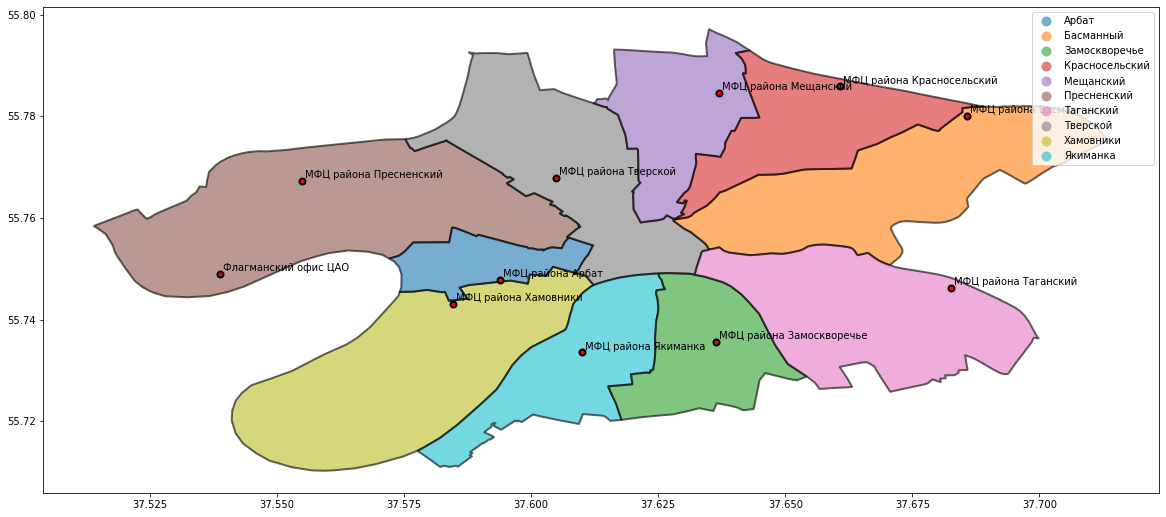

In [21]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
base = data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6, edgecolor='black', linewidth=2)
gdf[gdf['AdmArea'] == "Центральный"].plot(color='red',edgecolor='k',linewidth = 2, legend=False,ax=base)
n = gdf[gdf['AdmArea'] == "Центральный"]
for x, y, label in zip(n.geometry.x, n.geometry.y, n['ShortName']):
    ax.annotate(label, xy=(x, y),xytext=(3, 3), textcoords="offset points")

Наша карта выглядит немного приплюснутой. Выровняем ее и добавим заголовок для всего чарта

Text(0.5, 1.0, 'МФЦ ЦАО Москвы')

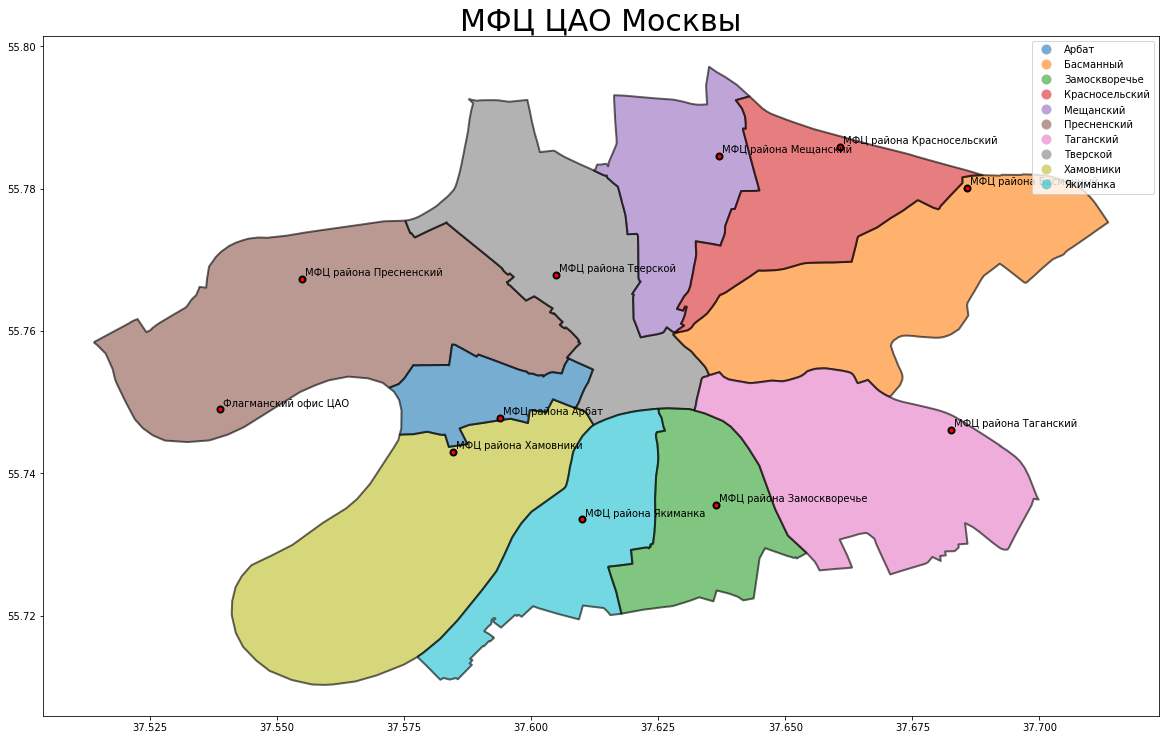

In [22]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
base = data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6, edgecolor='black', linewidth=2)
gdf[gdf['AdmArea'] == "Центральный"].plot(color='red',edgecolor='k',linewidth = 2, legend=False,ax=base)
n = gdf[gdf['AdmArea'] == "Центральный"]
for x, y, label in zip(n.geometry.x, n.geometry.y, n['ShortName']):
    ax.annotate(label, xy=(x, y),xytext=(3, 3), textcoords="offset points")
ax.set(aspect=1.4, facecolor='white')
ax.set_title('МФЦ ЦАО Москвы',fontsize= 30)

В завершении, увеличим легенду и перенесем ее в левую часть, чтобы она не перекрывала карту

Text(0.5, 1.0, 'МФЦ ЦАО Москвы')

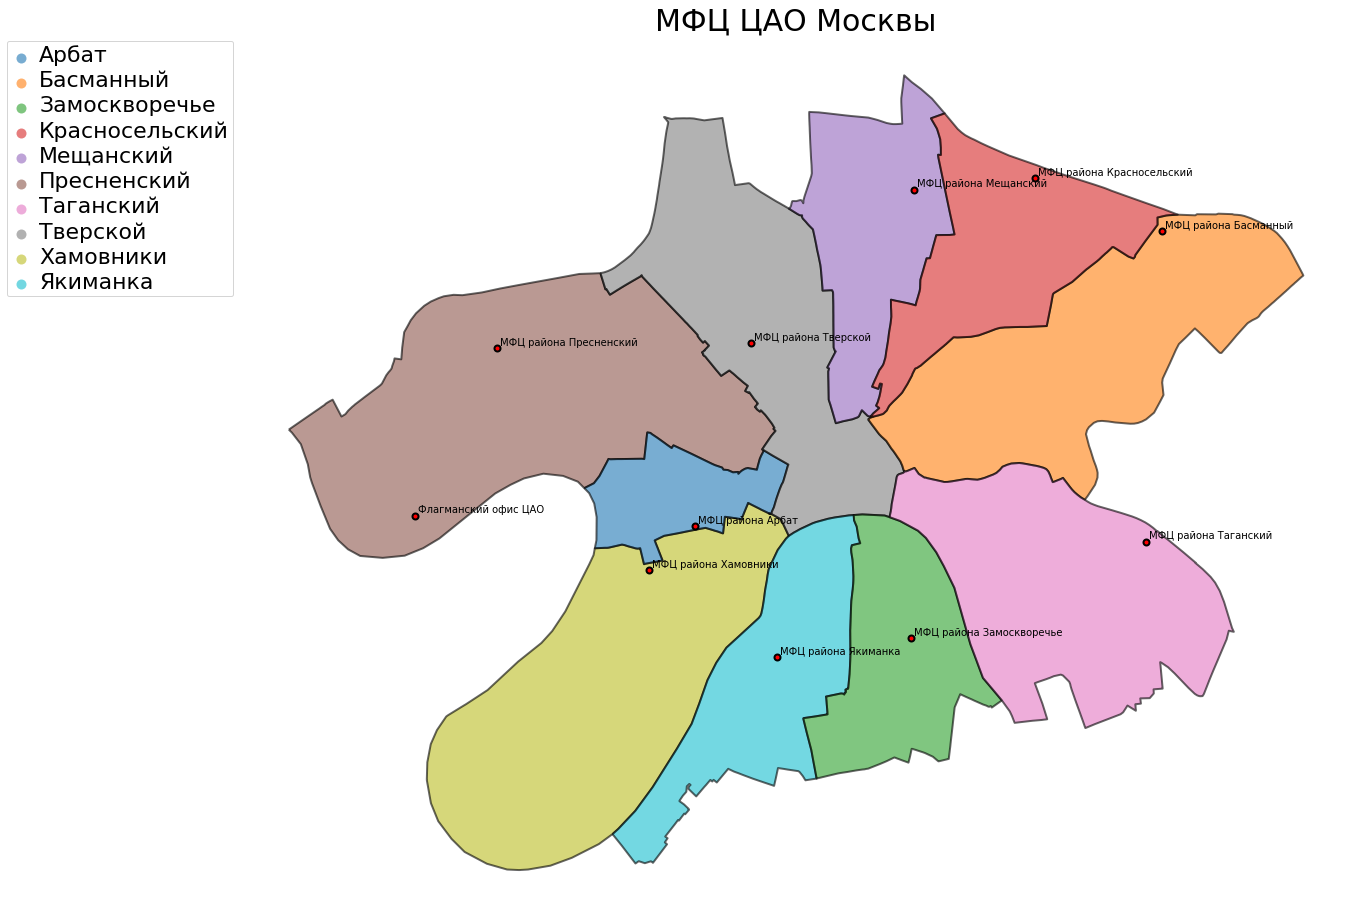

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
base = data[data["NAME_AO"] == "Центральный"].plot(ax=ax, legend=True,column="NAME", alpha=0.6, edgecolor='black', linewidth=2)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0,1))
plt.setp(ax.get_legend().get_texts(), fontsize='22')
ax.set_axis_off()
gdf[gdf['AdmArea'] == "Центральный"].plot(color='red',edgecolor='k',linewidth = 2, legend=False,ax=base)
n = gdf[gdf['AdmArea'] == "Центральный"]
for x, y, label in zip(n.geometry.x, n.geometry.y, n['ShortName']):
    ax.annotate(label, xy=(x, y),xytext=(3, 3), textcoords="offset points")
ax.set(aspect=1.8, facecolor='white')
ax.set_title('МФЦ ЦАО Москвы',fontsize= 30)